In [1]:
from scipy.stats import ttest_1samp
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_csv('ab_stats.csv')
data.head(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [14]:
data.purchase = data.purchase.astype('uint8')       # поменяем тип данных 
data.num_purchases = data.num_purchases.astype('uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  uint8  
 2   purchase       23652 non-null  uint8  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), object(1), uint8(2)
memory usage: 600.7+ KB


In [15]:
data.shape

(23652, 5)

In [16]:
data.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [9]:
data.isna().sum()           # cсмотрим пропуски

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

In [33]:
data.ab_group.value_counts()    # распределение юзеров по группам

A    11835
B    11817
Name: ab_group, dtype: int64

In [17]:
sorted = data[data['av_site visit']<0]      # посмотрим данные с отрицателными значениями
sorted

,revenue,num_purchases,purchase,ab_group,av_site visit
1789,0.0,0,0,A,-12.073486
1856,0.0,0,0,A,-0.683411
5122,0.0,0,0,A,-0.045455
7109,0.0,0,0,A,-12.073486
8118,0.0,0,0,A,-0.126946
...,...,...,...,...,...
23567,0.0,0,0,B,-3.901748
23606,0.0,0,0,B,-2.284448
23626,0.0,0,0,B,-3.528928
23634,0.0,0,0,B,-1.708265


In [18]:
data[(data['av_site visit']<0) & (data['ab_group'] == 'A')]      # посмотрим данные по группе А

,revenue,num_purchases,purchase,ab_group,av_site visit
1789,0.0,0,0,A,-12.073486
1856,0.0,0,0,A,-0.683411
5122,0.0,0,0,A,-0.045455
7109,0.0,0,0,A,-12.073486
8118,0.0,0,0,A,-0.126946
9770,0.0,0,0,A,-0.045455


In [21]:
data[(data['av_site visit']<0) & (data['ab_group'] == 'B') & (data['purchase'] == 1)]   # получили отрицательные данные. По идее нужно все вернуть

,revenue,num_purchases,purchase,ab_group,av_site visit
14454,2.487817,1,1,B,-1.168899
15414,50.240634,5,1,B,-5.646523
17051,6.121677,2,1,B,-2.902468
17286,29.990000,1,1,B,-0.806701
18487,4.990000,1,1,B,-0.992420
19087,2.482744,1,1,B,-3.738912
20354,3.640755,2,1,B,-1.266251
20558,4.990000,1,1,B,-0.828202
20561,2.432369,1,1,B,-0.952948
21154,2.328238,1,1,B,-3.282128


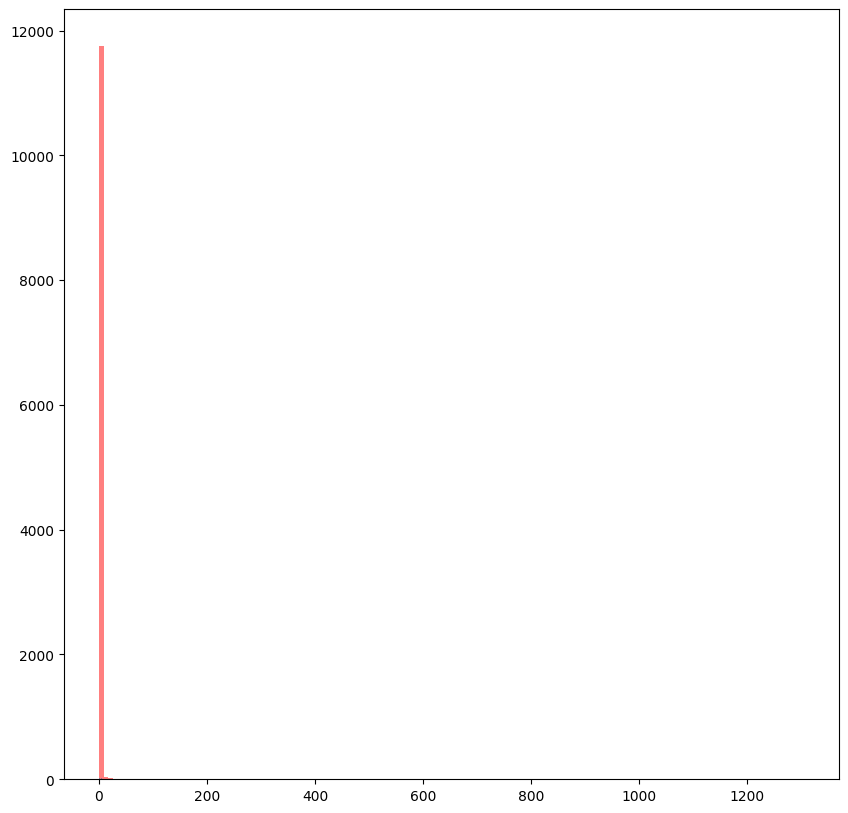

In [25]:
plt.figure(figsize=(10, 10))
control_visit_all = data['revenue'][data['ab_group'] == 'A']
test_visit_all =data['revenue'][data['ab_group'] == 'B']


plt.hist(control_visit_all, color='r', bins=150, alpha = 0.5)
plt.hist(test_visit_all,  bins=150, alpha = 0.5)


plt.show()

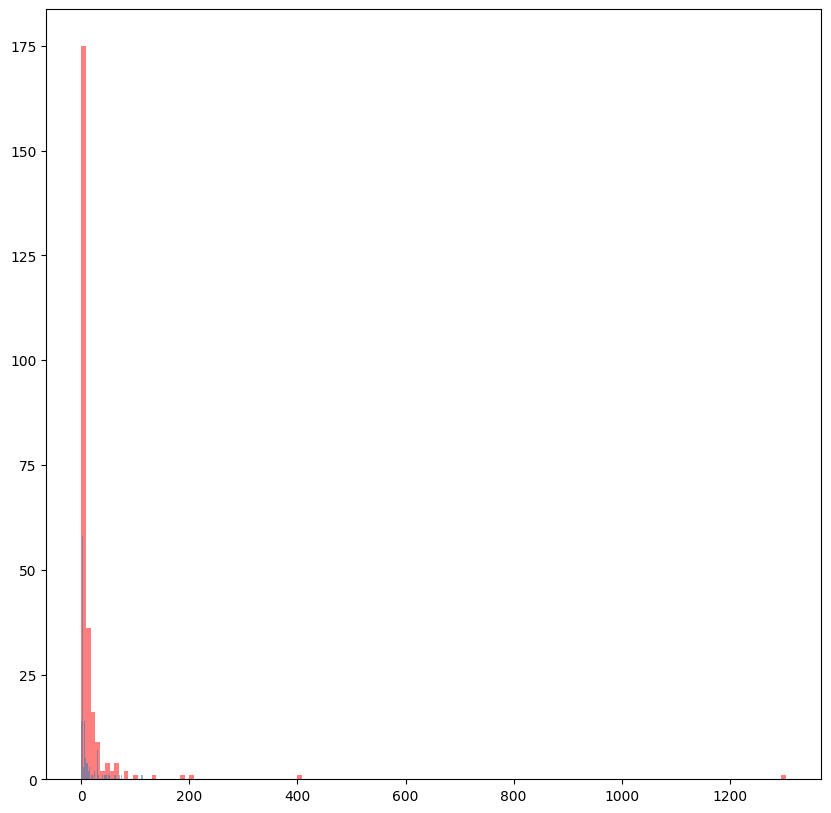

In [29]:
plt.figure(figsize=(10, 10))
control_visit_all = data['revenue'][(data['ab_group'] == 'A') & (data['revenue'] > 0)]
test_visit_all =data['revenue'][(data['ab_group'] == 'B') & (data['revenue'] > 0)]


plt.hist(control_visit_all, color='r', bins=150, alpha = 0.5)
plt.hist(test_visit_all,  bins=150, alpha = 0.5)


plt.show()

РАСПРЕДЕЛЕНИЕ НЕ НОРМАЛЬНОЕ

Непараметрический критерий Манн-Уитни

In [32]:
from scipy.stats import mannwhitneyu
mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                                                  y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

p-value > alpha - НЕТ РАЗЛИЧИЙ